In [3]:
print("HellO")

HellO


In [5]:
pip install yfinance

  Using cached yfinance-0.2.51-py2.py3-none-any.whl.metadata (5.5 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.17.8.tar.gz (948 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached yfinance-0.2.51-py2.py3-none-any.whl (104 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139014 sha256=e71d6d3b0358258491c6efa385cb073ae0eac00e8efcb6c40ddc4ca7fe6be192
  Stored in directory: c:\users\a\appdata\local\pip\cache\wheels\8f\65\34\456800445efeafb0516

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [8]:
start='2012-01-01'
end='2025-01-07'
stock = 'NVDA'
data= yf.download(stock,start,end)
print(data)

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            NVDA        NVDA        NVDA        NVDA       NVDA
Date                                                                 
2012-01-03    0.321919    0.330173    0.321231    0.327881  468044000
2012-01-04    0.325588    0.326963    0.319168    0.322148  347372000
2012-01-05    0.337281    0.338886    0.322607    0.323983  563548000
2012-01-06    0.333384    0.337281    0.329486    0.337052  533252000
2012-01-09    0.333384    0.339804    0.331091    0.333613  508244000
...                ...         ...         ...         ...        ...
2024-12-30  137.490005  140.270004  134.020004  134.830002  167734700
2024-12-31  134.289993  138.070007  133.830002  138.029999  155659200
2025-01-02  138.309998  138.880005  134.630005  136.000000  198247200
2025-01-03  144.470001  144.899994  139.729996  140.009995  229322500
2025-01-06  149.429993  152.160004  147.820007  148.589996  265377400

[3273 rows x 5 colu

In [44]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


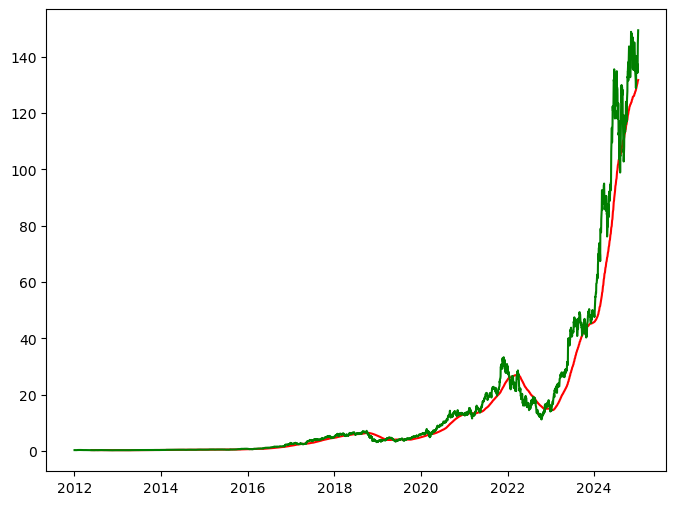

In [10]:
ma_100_days= data.Close.rolling(100).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

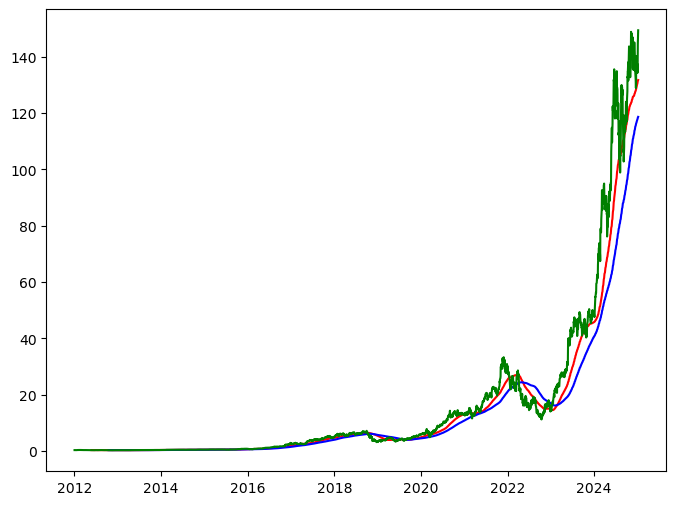

In [12]:
ma_200_days=data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))

plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show

In [16]:
data.dropna(inplace=True)
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test= pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

data_train.shape[0]

2618

In [18]:
data_test.shape[0]

655

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
data_train_scale=scaler.fit_transform(data_train)
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
x,y=np.array(x),np.array(y)    

In [37]:
pip install keras

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 9.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Dropout,LSTM

In [24]:
from tensorflow.keras.models import Model


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



In [30]:
model=Sequential()
model.add(LSTM(units=50,activation='relu', return_sequences=True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [93]:
pip install tensorflow --upgrade


Note: you may need to restart the kernel to use updated packages.


In [34]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [36]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)



Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 0.0277
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0053
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 0.0038
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 0.0035
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.0033
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 0.0031
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.0024
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0029
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0026
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.0031
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.0032
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.0027
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.0027
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0022
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0028
Epo

In [40]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [44]:
    pas_100_days=data_train.tail(100)

In [46]:
data_test=pd.concat([pas_100_days,data_test], ignore_index=True)

In [50]:
data_test_scale=scaler.fit_transform(data_test)

In [54]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)    

In [56]:
y_predict=model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [66]:
scale=1/scaler.scale_


In [68]:
y_predict=y_predict*scale

In [70]:
y=y*scale

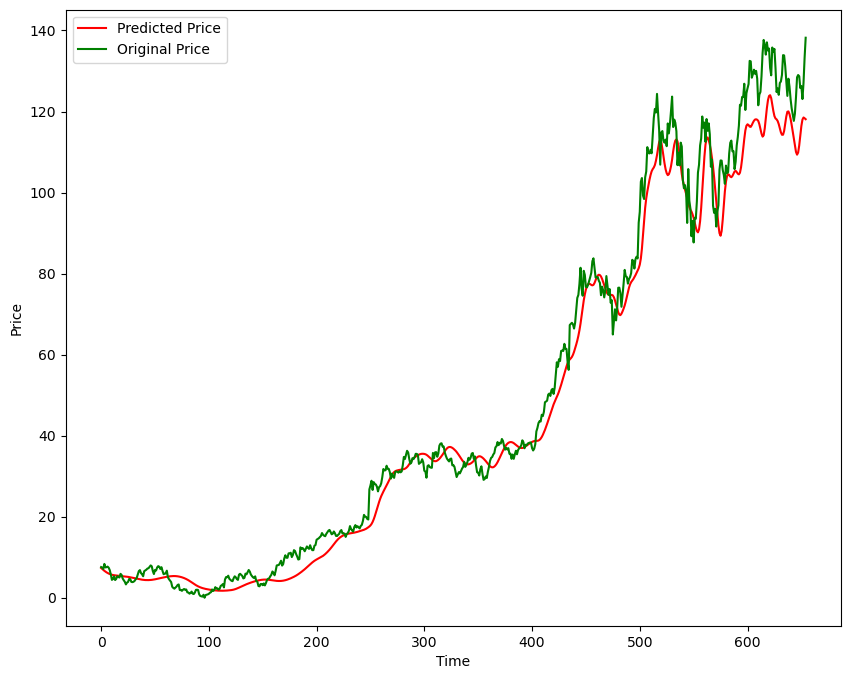

In [72]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [74]:
model.save('Stock Prediction Model.keras')